In [1]:
using LinearAlgebra, Random, Distributions, GaussianMixtures, Plots

In [2]:
Random.seed!(1234);
μ1 = [1.0, 1]
μ2 = [2.0, -3]
Σ1 = [1.0 0; 0 1]
Σ2 = [1.0 0.5; 0.5 1]
gaussian1 = MvNormal(μ1, Σ1)
gaussian2 = MvNormal(μ2, Σ2)

FullNormal(
dim: 2
μ: [2.0, -3.0]
Σ: [1.0 0.5; 0.5 1.0]
)


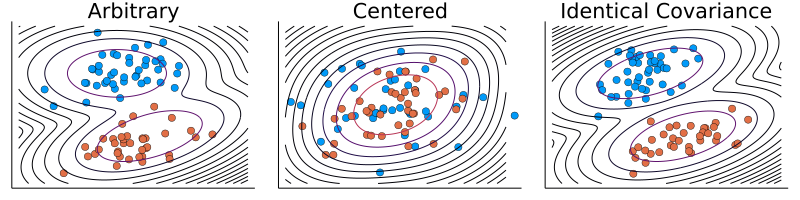

In [66]:
function plotgmm(gaussian1, gaussian2, title)
    # sample 80 gaussian mixture data points by first determining how many times we drew from the first one
    N = 80;
    m = rand(Binomial(80,0.5)) 
    gaussiandata1 = rand(gaussian1, m)
    gaussiandata2 = rand(gaussian2, N-m)
    gaussiandata = [gaussiandata1 gaussiandata2]

    plot(gaussiandata1[1, :], gaussiandata1[2, :], axis=nothing,  seriestype=:scatter, legend=false, label="Gaussian centered at (1, 1)", draw_arrow=true)
    plot!(gaussiandata2[1, :], gaussiandata2[2, :], axis=nothing, seriestype=:scatter, legend=false, label="Gaussian centered at (2, -3)")

    g1pdf = (x, y)->pdf(gaussian1, [x; y])
    g2pdf = (x, y)->pdf(gaussian2, [x; y])
    gmmpdf = (x, y)->0.5*g1pdf(x, y) + 0.5*g2pdf(x, y)
    x_min = min(gaussian1.μ[1], gaussian2.μ[1])
    x_max = max(gaussian1.μ[1], gaussian2.μ[1])
    y_min = min(gaussian1.μ[2], gaussian2.μ[2])
    y_max = max(gaussian1.μ[2], gaussian2.μ[2])
    x = x_min-3:0.01:x_max+3;
    y = y_min-3:0.01:y_max+3;
    z = [gmmpdf(a, b) for a in x, b in y]
    z_min = min(z...)
    z_max = max(z...)
    z_steps = exp.(range(log(z_min), stop=log(z_max), length=15))
    p = contour!(x, y, gmmpdf, levels = z_steps, title=title, axis=nothing, fill=false, colorbar=false) #label="pdf of mixture distribution" 
    return p
end

p1 = plotgmm(MvNormal(μ1, Σ1), MvNormal(μ2, Σ2), "Arbitrary")
p2 = plotgmm(MvNormal([0; 0], Σ1), MvNormal([0; 0], Σ2), "Centered")
p3 = plotgmm(MvNormal(μ1, Σ2), MvNormal(μ2, Σ2), "Identical Covariance")
plot(p1, p2, p3, layout=(1, 3), size=(800,200))